# Project 1 Forecast Cab Booking

[1. Import the required libraries and load the training and testing dataset 	](#1.-Import-the-required-libraries-and-load-the-training-and-testing-dataset)

[2. Analyze the dataset and write your observations](#2.-Analyze-the-dataset-and-write-your-observations)
                [a. Check the shape of the training and testing set ](#a.-check-the-shape-of-the-training-and-testing-set)
[b. Print the data types of each column](#b.-Print-the-data-types-of-each-column)\
[c. Check the missing values present in the dataset ](#c.-Check-the-missing-values-present-in-the-dataset)
                
[3. Perform Feature Engineering: 					](#3.perform-feature-engineering:) \
[a. Create new columns date, hour, weekDay, month from datetime column](#a.-create-new-columns-date,-hour,-weekday,-month-from-datetime-column)\
[b. Coerce the datatype of season, holiday, workingday, and weather to category ](#b.-coerce-the-datatype-of-season,-holiday,-workingday,-and-weather-to-category)\
[c. Drop the datetime column as we have already extracted useful features from it ](#c.-drop-the-datetime-column-as-we-have-already-extracted-useful-features-from-it)

[4. Perform Outlier Analysis: ](#4.-perform-outlier-analysis:)		\
[a. Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference ](#a.-plot-box-plots-across-various-features-like-season,-hour-of-the-day,-working_day,-etc-to-see-if-there-are-any-outlier-and-note-down-your-inference)\
[b. Remove the outliers present in the dataset ](#b.-remove-the-outliers-present-in-the-dataset)


[5. Perform Correlation Analysis:](#5.-perform-correlation-analysis:)					\
[a. Plot a correlation plot between 'total booking' and ['temp', 'atemp', 'humidity', 'windspeed']](#a.-plot-a-correlation-plot-between-'total-booking'-and-['temp',-'atemp',-'humidity',-'windspeed'])\
[b. Write down your inference in the markdown cell ](#b.-write-down-your-inference-in-the-markdown-cell)

[6. Perform Data Visualization:](#6.-perform-data-visualization:)
[a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well](#a.-visualize-distribution-of-data:-total_booking-column-and-plot-the-probability-distribution-plot-for-the-column-as-well)\
[b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)](#b.-visualize-total_booking-vs-(month,-season,-hour,-weekday,-usertype))\
[c. Use Histograms to plot all the continuous variables present in the data](#c.-use-histograms-to-plot-all-the-continuous-variables-present-in-the-data)

[7. Convert the categorical variables into one hot vector](#7.-convert-the-categorical-variables-into-one-hot-vector)

[8. Split your dataset for training and testing](#8.-split-your-dataset-for-training-and-testing)


[9. Fit various ml_models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)](#9.-fit-various-ml_models-(random-forest-regressor,-ada-boost-regressor,-bagging-regressor,-svr,-and-k-neighbors-regressor))

[10. Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm](#10.-display-a-factor-plot-to-visualize-the-rmse-values-achieved-by-different-modeling-algorithm)

[11. Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_](#11.-perform-hyper-parameter-tuning-on-the-best-model-using-gridsearchcv-and-print-the-best-parameters-using-model.best_params_)

[12. Perform prediction on the test set and print the mean_squared_log_error](#12.-perform-prediction-on-the-test-set-and-print-the-mean_squared_log_error)

## Libraries and dataset
**Required libraries**
```
gdown
matplotlib
seaborn
numpy
pandas
scikit-learn
scipy
xgboost
```

**Uncomment the below cell to download the required libraries**

In [ ]:
# !pip install --upgrade --no-cache gdown
# !pip install seaborn
# !pip install -U scikit-learn
# !pip install xgboost
# !pip install matplotlib
# !pip install numpy
# !pip install opencv-python
# !pip install pandas

In [ ]:
import os
import gdown
import zipfile

# Set path to check for name.zip file
path = "."

# Check if file exists in path
if os.path.exists(os.path.join(path, "proj-1_data.zip")):
    # Unzip the file
    with zipfile.ZipFile(os.path.join(path, "proj-1_data.zip"), 'r') as zip_ref:
        zip_ref.extractall(path)
else:
    # Download the zip file using gdown id
    # https://drive.google.com/file/d/1RyHFgBNFspb15YHJGGb1NMB9lbM-n_W1/view?usp=share_link
    url = 'https://drive.google.com/uc?id=1RyHFgBNFspb15YHJGGb1NMB9lbM-n_W1'
    output = os.path.join(path, "proj-1_data.zip")
    gdown.download(url, output, quiet=True)
    # Unzip the file
    with zipfile.ZipFile(os.path.join(path, "proj-1_data.zip"), 'r') as zip_ref:
        zip_ref.extractall(path)


## 1. Import the required libraries and load the training and testing dataset

1. Import the required libraries.

In [ ]:
%cd proj-1/data

/content/proj-1/data


In [ ]:
# Importing required libraries
import calendar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from datetime import datetime
from scipy import stats
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_squared_log_error)
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
sns.set_palette('cubehelix')

2. Load the training.and testing data.

In [ ]:
# load the training and testing dataset
train = pd.read_csv('train.csv')
train_label = pd.read_csv('train_label.csv', header = None)
test = pd.read_csv('test.csv')
test_label = pd.read_csv('test_label.csv', header = None)

##  2. Analyze the dataset and write your observations
### a. Check the shape of the training and testing set

Calculate the shape of ```train```, ```train_label```, ```test``` and ```test_label```

In [ ]:
print(f'Shape of the train:{train.shape}, train_label:{train_label.shape}, test:{test.shape}, test_label:{test_label.shape}')

Shape of the train:(8708, 9), train_label:(8708, 1), test:(2178, 9), test_label:(2178, 1)


### b. Print the data types of each column

In [ ]:
# Print the data types of each column
print('Data types of columns:\n', train.dtypes)

Data types of columns:
 datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


### c. Check the missing values present in the dataset

Check if there are any missing values in the given dataset.

In [ ]:
# Check if there are any missing values in the given dataset.
print('Missing values in training set:\n', train.isna().sum())
print('Missing values in testing set:\n', test.isna().sum())

Missing values in training set:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64
Missing values in testing set:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


In [ ]:
# Adding the data from train_label and test_label to the column Total_booking for the respective training and testing dataframes
train['Total_booking']= train_label[0]
test['Total_booking'] = test_label[0]

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


## 3.Perform Feature Engineering:
### a. Create new columns date, hour, weekDay, month from datetime column


1. The function `pd.to datetime()` is used to transform the `datetime` column in both the training and testing datasets into a Pandas `datetime` object that can be handled using built-in Pandas methods.

2. The next four lines of code extract new features from the `datetime` column and construct new columns in both the training and testing datasets for each of them:

    a. `train['date'] = train['datetime'].`

    `dt.date`: generates a new `date` column that just contains the date portion of the `datetime` object.

    b. `train['hour'] = train['datetime'].`

    `dt.hour`: generates a new `hour` column holding just the `datetime` object`s hour portion.

    c. `train['weekDay'] = train['datetime']. `

    `dt.weekday`: adds a new `weekDay` column to the `datetime` object that contains the day of the week (0=Monday, 1=Tuesday, etc.).

    d. `train['month'] = train['datetime']. `

    `dt.month`: adds a new`month` column that solely contains the month portion of the `datetime` object.

In [ ]:
# New columns from date time columns
train['date']= train.datetime.apply(lambda x : x.split()[0])
train['hour']= train.datetime.apply(lambda x : x.split()[1].split(':')[0])
train['weekday']= train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,'%m/%d/%Y').weekday()])
train['month']= train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,'%m/%d/%Y').month])

test['date']= test.datetime.apply(lambda x : x.split()[0])
test['hour']= test.datetime.apply(lambda x : x.split()[1].split(':')[0])
test['weekday']= test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,'%m/%d/%Y').weekday()])
test['month']= test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,'%m/%d/%Y').month])

### b. Coerce the datatype of season, holiday, workingday, and weather to category


1. The following four lines of code utilise the `.astype('category')` function to transform the`season,` `holiday,` `workingday,` and `weather` columns in both the training and testing datasets into categorical variables. This minimises the dataset's memory use and assists the machine learning model in treating these columns as categorical variables rather than continuous variables.

1. Finally, the last two lines of code are used to remove the old `datetime` column from both the training and testing datasets, since it is no longer required now that the new columns have been added.
    

In [ ]:
# Coercing the datatype of season, holiday,workingday, and weather to category
train['season'] = train['season'].astype('category')
train['holiday'] = train['holiday'].astype('category')
train['workingday'] = train['workingday'].astype('category')
train['weather'] = train['weather'].astype('category')

test['season'] = test['season'].astype('category')
test['holiday'] = test['holiday'].astype('category')
test['workingday'] = test['workingday'].astype('category')
test['weather'] = test['weather'].astype('category')

## c. Drop the datetime column as we have already extracted useful features from it

In [ ]:
# Dropping the datetime column
train = train.drop('datetime', axis=1)
test = test.drop('datetime', axis=1)

In [ ]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September


## 4. Perform Outlier Analysis:
### a. Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference

1. The next section of code generates box plots to visualise data outliers. A box plot depicts a numerical variable's distribution, including the median, quartiles, and any outliers.

2. The `plt.figure(figsize=(20,10))` line generates a figure object 20 inches by 10 inches in size.

3. The `plt.subplot(2,2,1)` line generates a grid of subplots with two rows and two columns and picks the first subplot for the box plot of the'season' variable against the 'Total booking' variable.

4. For the first subplot, the`sns.boxplot(train['season']`, `train labels['Total booking'])` line generates a box plot of the'season' variable against the 'Total booking' variable.

5. Repeat steps 4 and 5 for the remaining three subplots, where the variables 'hour,' 'workingday,' and 'weather' are plotted against the variable 'Total_booking'.

6. The box plot figure is shown by the `plt.show()` line.

7. The next piece of code generates box plots to show outliers in the variables 'temp', 'atemp', 'humidity', and 'windspeed'.

8. Repeat steps 3–7 to construct a figure object 20 inches by 10 inches in size with a grid of two rows and two columns of subplots for each of the four variables.


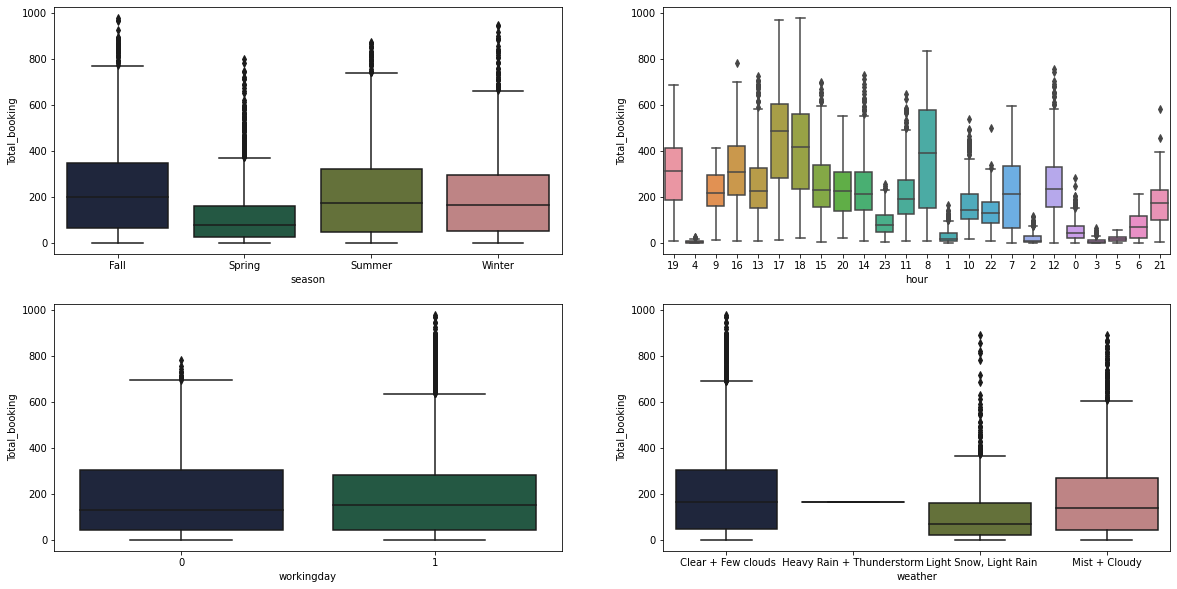

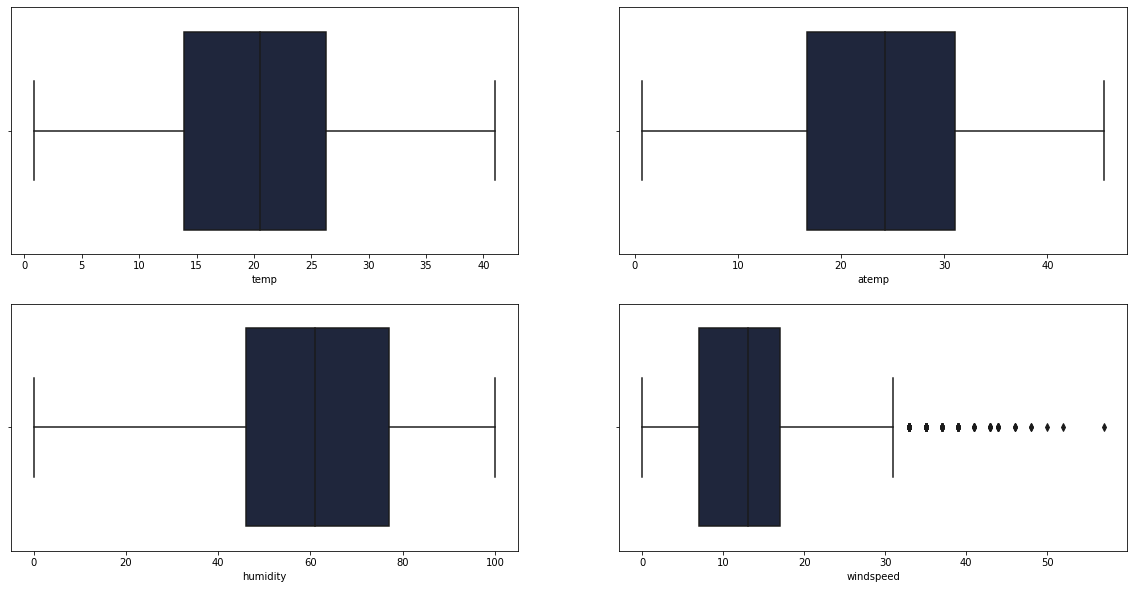

In [ ]:
# Plotting box plots to visualize outliers Total_booking
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x=train['season'], y=train['Total_booking'])
plt.subplot(2,2,2)
sns.boxplot(x=train['hour'], y=train['Total_booking'])
plt.subplot(2,2,3)
sns.boxplot(x=train['workingday'], y=train['Total_booking'])
plt.subplot(2,2,4)
sns.boxplot(x=train['weather'], y=train['Total_booking'])
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(x=train['temp'])
plt.subplot(2,2,2)
sns.boxplot(x=train['atemp'])
plt.subplot(2,2,3)
sns.boxplot(x=train['humidity'])
plt.subplot(2,2,4)
sns.boxplot(x=train['windspeed'])
plt.show()

### b. Remove the outliers present in the dataset
1. `train=train[(train['windspeed']=45)` & `(train['humidity']=100)]` line eliminates outliers from the variables 'windspeed' and 'humidity' in the 'train' dataset. The condition `(train['windspeed']=45)` & `(train['humidity']=100)` removes rows with a 'windspeed' value higher than 45 or a 'humidity' value greater than 100.

In [ ]:
# Removing the outliers
train = train[(train['windspeed']<=45) & (train['humidity']<=100)]

## 5. Perform Correlation Analysis:
### a. Plot a correlation plot between 'total booking' and ['temp', 'atemp', 'humidity', 'windspeed']

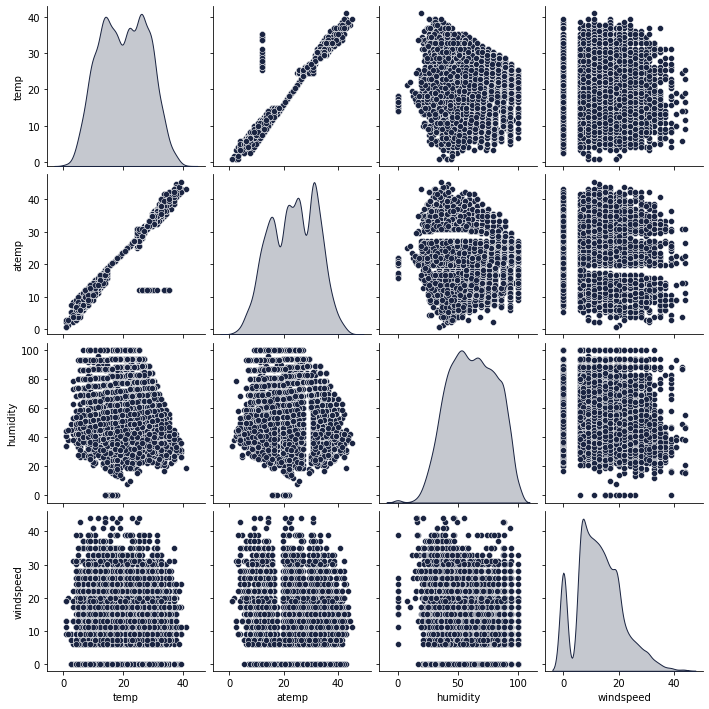

In [ ]:
sns.pairplot(train[['temp', 'atemp', 'humidity', 'windspeed'] ], diag_kind ='kde')

<AxesSubplot:xlabel='weather', ylabel='Total_booking'>

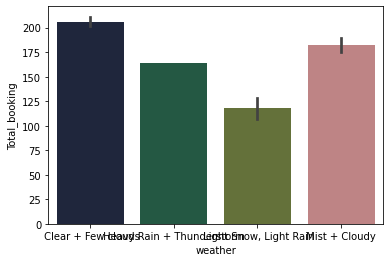

In [ ]:
sns.barplot(x = 'weather', y = 'Total_booking', data = train)

<AxesSubplot:xlabel='weekday', ylabel='Total_booking'>

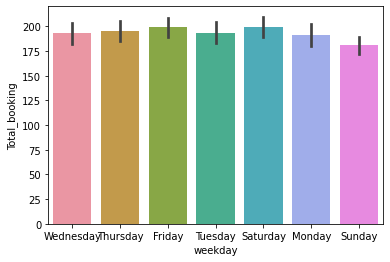

In [ ]:
sns.barplot(x = 'weekday', y = 'Total_booking', data = train)

<AxesSubplot:xlabel='month', ylabel='Total_booking'>

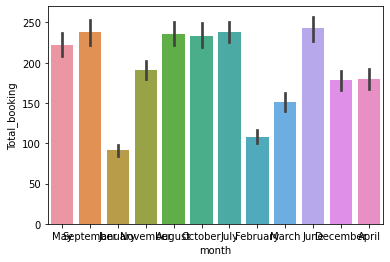

In [ ]:
sns.barplot(x = 'month', y = 'Total_booking', data = train)

<AxesSubplot:xlabel='season', ylabel='Total_booking'>

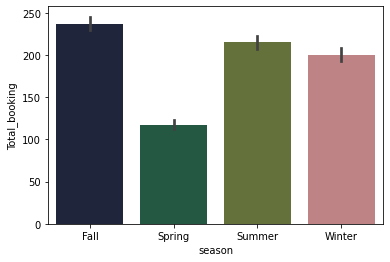

In [ ]:
sns.barplot(x = 'season', y = 'Total_booking', data = train)

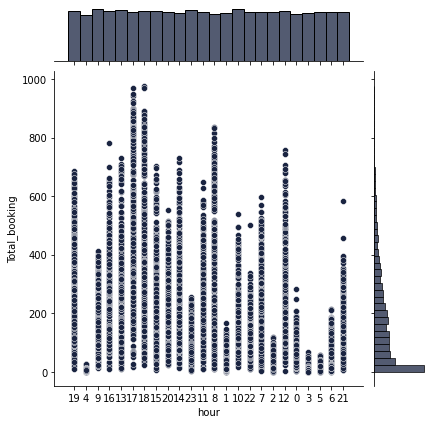

In [ ]:
sns.jointplot(x=train.hour, y=train.Total_booking, kind='scatter')
plt.show()

### b. Write down your inference in the markdown cell

1. **Sign of the correlation coefficient**:
<table><thead><tr><th>Sign of the correlation coefficient</th><th></th></tr></thead><tbody><tr><td>Postitive (+ve)<br></td><td>'temp' and 'atemp'  (+0.98), 'temp' and 'Total_booking' <br>(+0.4), 'atemp' and 'Total_booking' <br>(+0.39), 'windspeed' and 'Total_booking' <br>(+0.94)</td></tr><tr><td>Negative (-ve)</td><td>'humidity' and 'temp' (−0.067), <br>'windspeed' and 'atemp' (−0.067),<br>'humidity' and 'atemp' (−0.045), <br>'windspeed' and 'temp' (−0.026), <br>'humidity' and 'windspeed' (−0.032),<br>'humidity' and 'Total_booking' (−0.031), <br>'temp' and 'windspeed' (−0.026)</td></tr></tbody></table>
</table>

2. **Strength of the correlation coefficient**:
<table><thead><tr><th>Strength of the correlation coefficient</th><th></th></tr></thead><tbody><tr><td>Strong correlation coefficient</td><td>'temp' and 'temp' (0.98)<br>'windspeed' and 'Total_booking' (0.94)</td></tr><tr><td>Moderate correlation coefficient</td><td>'atemp' and 'Total_booking' <br>(0.39), <br>temp' and 'Total_booking' (0.4)</td></tr><tr><td>Weak correlation coefficient:</td><td>N/A</td></tr></tbody></table>                                                                 |

3. In the matrix below, the lowest value is -0.032 for "humidity" and "windspeed." And the strongest correlation is between "atemp" and "temp," at 0.98.

4. "temp" and "atemp" are highly correlated, which will cause multicollinearity. For the best outcome, we will have to remove these columns from the data.

5. Based on this correlation, it is easy to find statistical significance. This can be done by calculating the p-value of the correlation coefficient. If the p-value is less than the significance level (typically 0.05), then the correlation coefficient is statistically significant.

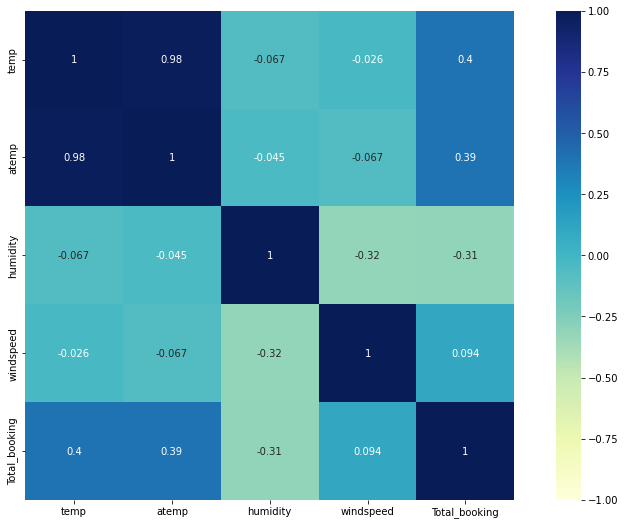

In [ ]:
corrmat = train.corr()
fig = plt.figure(figsize = (15,9))

sns.heatmap(corrmat, cmap ='YlGnBu', annot = True, vmax = 1, square = True,vmin=-1)
plt.show()

In [ ]:
train.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
hour             0
weekday          0
month            0
dtype: int64

OUTLIERS TREATMENT

In [ ]:
train.describe()

,temp,atemp,humidity,windspeed,Total_booking
count,8700.000000,8700.000000,8700.000000,8700.000000,8700.000000
mean,20.246554,23.660759,61.670690,12.810529,193.067586
std,7.810736,8.495264,19.192713,8.119079,181.580056
min,0.820000,0.760000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,46.000000,7.001500,43.000000
50%,20.500000,24.240000,61.000000,12.998000,148.000000
75%,26.240000,31.060000,77.000000,16.997900,286.000000
max,41.000000,45.455000,100.000000,43.998900,977.000000


<AxesSubplot:>

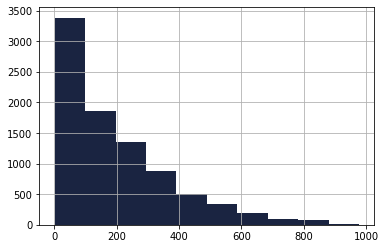

In [ ]:
train.Total_booking.hist()

In [ ]:
rev_stat=train.Total_booking.describe()
print(rev_stat)
# calculating interquartile range
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print()
print(f'The upper and lower bounds for suspected outliers are {lower} and {upper}')

count    8700.000000
mean      193.067586
std       181.580056
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Total_booking, dtype: float64

The upper and lower bounds for suspected outliers are -321.5 and 650.5


In [ ]:
outliers=train[train.Total_booking>upper].index.tolist()
train[train.Total_booking>upper]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
5,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8/17/2012,17,Friday,August
27,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813,5/2/2012,18,Wednesday,May
30,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872,7/10/2012,17,Tuesday,July
52,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790,6/5/2012,18,Tuesday,June
70,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669,5/18/2012,18,Friday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,662,3/14/2012,8,Wednesday,March
8582,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,737,10/15/2012,8,Monday,October
8676,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,659,5/12/2012,13,Saturday,May
8681,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,858,8/8/2012,17,Wednesday,August


In [ ]:
#Original data with outliers
train.shape

(8700, 13)

In [ ]:
for idx in outliers:
    train.drop(idx,inplace=True)

In [ ]:
# After removing outliers
train.shape

(8458, 13)

In [ ]:
train.dtypes

season           category
holiday          category
workingday       category
weather          category
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_booking       int64
date               object
hour               object
weekday            object
month              object
dtype: object

## 6. Perform Data Visualization:
### a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well

1. `sns.displot(data=train, x='Total_booking', kde=True)` is used to visualize the distribution
1. `sns.kdeplot(data=train, x='Total_booking')` is used to plot the probability distribution for 'Total_booking'

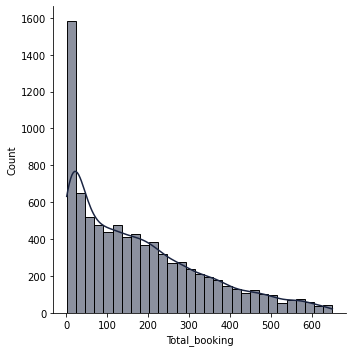

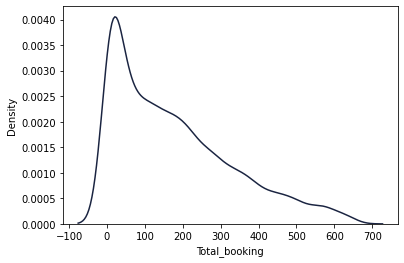

In [ ]:
# Visualize distribution of data: total_booking column
sns.displot(data=train, x='Total_booking', kde=True)
plt.show()

# Plotting the probability distribution plot for the column 'Total_booking'
sns.kdeplot(data=train, x='Total_booking')
plt.show()

### b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)

1. ```sns.catplot(data=train, x='month', y='Total_booking', kind='bar', hue='workingday')``` is used to visualize 'Total_booking' vs 'month' with `hue` 'workingday'.
1. `sns.catplot(data=train, x='season', y='Total_booking', kind='bar', hue='holiday')` is used to visualize 'Total_booking' vs 'season' with `hue` 'holiday'.
1. `sns.catplot(data=train, x='hour', y='Total_booking', kind='bar', hue='weather')` is used to visualize 'Total_booking' vs 'hour' with `hue` 'weather'.
1. `sns.catplot(data=train, x='weekday', y='Total_booking', kind='bar', hue='holiday')` is used to visualize 'Total_booking' vs 'weekday' with `hue` 'holiday'.
1. `sns.catplot(data=train, x='workingday', y='Total_booking', kind='bar', hue='holiday')` is used to visualize Total_booking' vs 'workingday' with `hue` 'holiday'.

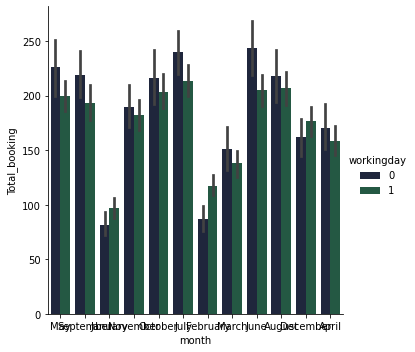

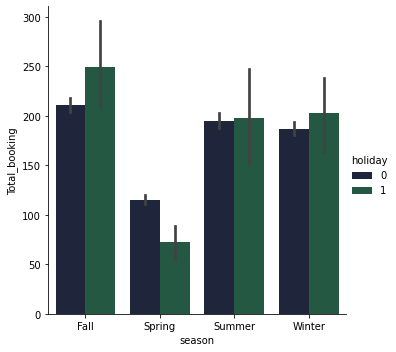

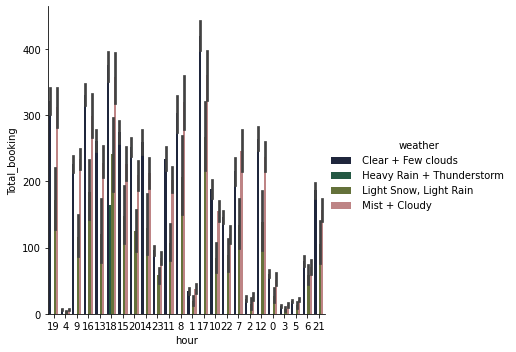

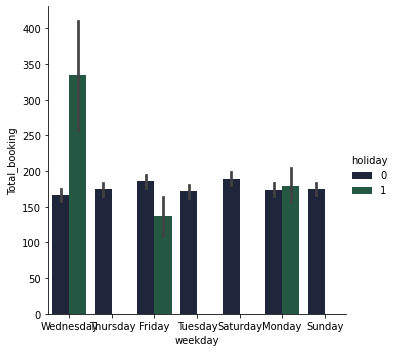

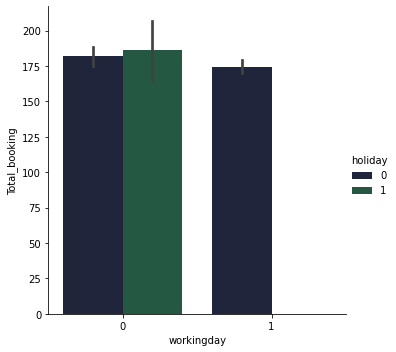

In [ ]:
# Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)
sns.catplot(data=train, x='month', y='Total_booking', kind='bar', hue='workingday')
sns.catplot(data=train, x='season', y='Total_booking', kind='bar', hue='holiday')
sns.catplot(data=train, x='hour', y='Total_booking', kind='bar', hue='weather')
sns.catplot(data=train, x='weekday', y='Total_booking', kind='bar', hue='holiday')
sns.catplot(data=train, x='workingday', y='Total_booking', kind='bar', hue='holiday')
plt.show()

### c. Use Histograms to plot all the continuous variables present in the data
1. `train.hist(column=['temp', 'atemp', 'humidity', 'windspeed', 'Total_booking'])` is used to plot the histograms of all continous variables in the data

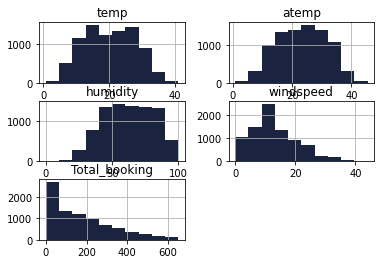

In [ ]:
# Use Histograms to plot all the continuous variables present in the data
train.hist(column=['temp', 'atemp', 'humidity', 'windspeed', 'Total_booking'])
plt.show()

In [ ]:
# Categorical variable segregation
columns = train.columns

categorical_col= [col for col in train.columns if train[col].dtypes=='O']
categorical_col

['date', 'hour', 'weekday', 'month']

In [ ]:
for col in categorical_col:
    print(f'Unique Values in {col} - {len(train[col].unique())}\n')

Unique Values in date - 456

Unique Values in hour - 24

Unique Values in weekday - 7

Unique Values in month - 12



In [ ]:
del(train['date'])
del(train['atemp']) # remove to avoid multicollinearity- Temp & atemp are highly correlated

In [ ]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,Total_booking,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,79,19.0012,5,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,209,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,184,13,Tuesday,September


## 7. Convert the categorical variables into one hot vector

1. `pd.get_dummies(train)` is used to convert the categorical veriables into one hot vector

In [ ]:
train = pd.get_dummies(train)
train.head()

,temp,humidity,windspeed,Total_booking,season_Fall,season_Spring,season_Summer,season_Winter,holiday_0,holiday_1,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,22.14,77,16.9979,504,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,28.70,79,19.0012,5,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,5.74,50,22.0028,139,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,13.94,29,8.9981,209,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,30.34,51,19.0012,184,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train.shape

(8458, 59)

## 8. Split your dataset for training and testing

1. `train_test_split` is used to split the dataset for training and testing

In [ ]:
X = train.drop('Total_booking', axis =1)
y = train['Total_booking']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)


(6766, 58)
(1692, 58)


## 9. Fit various ml_models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor, SVR, and K-Neighbors Regressor)

1. Initially, a list of regression models such as `RandomForestRegressor()`, `AdaBoostRegressor()`, `BaggingRegressor()`, `SVR()`, `KNeighborsRegressor()`, `DecisionTreeRegressor()`,`XGBRFRegressor()`, and `GradientBoostingRegressor()` is constructed. All of these are machine learning models for regression situations.

2. The root mean squared error (RMSE) values for each model are stored in a list named rmse values.

3. A `for` loop is used to traverse over the models in the list. The `fit()` function is run for each model to fit the model to the training data `X_trai` and `y_train`.

4. The model is then asked to predict the target variable on the test set `X_test` using the `predict()` function. The scikit-learn function`mean squared error()` is used to determine the mean squared error (MSE) between the predicted target variable and the actual target variable `y_test`.

5. The square root of the MSE is then used to compute the root mean squared error (RMSE) using numpy's `sqrt()` function.

6. Each model's RMSE value is added to the list rmse values.

7. After the fitting and evaluation of all models, a pandas DataFrame is constructed to record the model names and their accompanying RMSE values.

8. To acquire the name of each model class, the model names are extracted from the list of models using a list comprehension and the class.name attribute.

9. The RMSE values and model names are then integrated into a data dictionary.

10. Lastly, the dictionary is used to generate the DataFrame `df_rmse`, which has two columns: "Model" and "RMSE," with each row representing a distinct model and its associated RMSE number.

In [ ]:
# Creating a list of ml_models
ml_models = [
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
    SVR(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    XGBRFRegressor(),
    GradientBoostingRegressor(),
]

# Fitting each model and calculating mean squared error on the test set
rmse_list = []
for model in ml_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

# Creating a pandas DataFrame for model names and their corresponding RMSE values
model_names = [model.__class__.__name__ for model in ml_models]
data = {'Model': model_names, 'RMSE': rmse_list}
df_rmse = pd.DataFrame(data)

## 10. Display a Factor plot to visualize the RMSE values achieved by different modeling algorithm

1.  `sns.set(style='whitegrid')`: This line sets the style of the Seaborn plot to "whitegrid", which adds horizontal grid lines to the plot.
    
2.  `factorplot = sns.catplot(x='Model', y='RMSE', data=df_rmse, kind='bar', height=4, aspect=2, palette='ocean', legend=False)`: This line creates a categorical plot using the `catplot()` function from Seaborn. The `x` parameter specifies the variable to be plotted on the x-axis, the `y` parameter specifies the variable to be plotted on the y-axis, the `data` parameter specifies the data to be used, the `kind` parameter specifies the type of plot to be created, the `height` parameter specifies the height of the plot in inches, the `aspect` parameter specifies the aspect ratio of the plot (width divided by height), the `palette` parameter specifies the color palette to be used, and the `legend` parameter specifies whether or not to show a legend on the plot.
    
3.  `factorplot.despine(left=True)`: This line eliminates the plot's left spine (the line that bounds the plot's left side), making it seem cleaner.
    
4.  `factorpl.set_ylabels('RMSE')`: This line adds a label to the plot's y-axis, indicating that the numbers on that axis are RMSE values.
    
5.  `factorplot.set_xlabels('Model')`: This line adds a label to the plot's x-axis to highlight that the data on that axis is derived from many machine learning models.
    
6.  `factorplot.set_xticklabels(rotation=45)`: This line rotates the tick labels on the x-axis by 45 degrees, making them easier to read if they are lengthy or many.
    
7.  `factorplot.fig.suptitle('RMSE values of different ml_models')`: This line adds a title to the graphic that indicates it displays the RMSE values of several machine learning models.
    
8.  `factorplot.savefig('rmse_factorplot.png', dpi=300)`: This line saves the plot as a PNG image file with the name "rmse factorplot.png" and a resolution of 640x480.

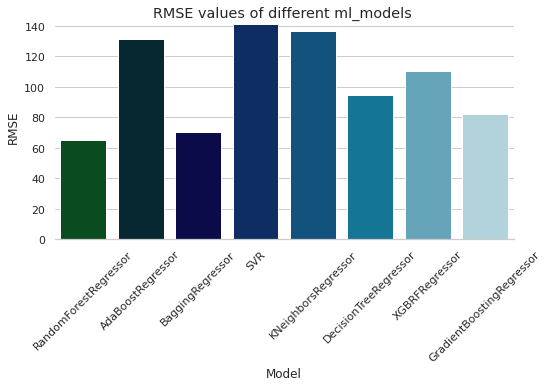

In [ ]:
# Creating a factor plot using Seaborn's factorplot() function
sns.set(style='whitegrid')
factorplot = sns.catplot(x='Model', y='RMSE', data=df_rmse, kind='bar', height=4, aspect=2, palette='ocean', legend=False)
factorplot.despine(left=True)
factorplot.set_ylabels('RMSE')
factorplot.set_xlabels('Model')
factorplot.set_xticklabels(rotation=45)
factorplot.fig.suptitle('RMSE values of different ml_models')
factorplot.savefig('rmse_factorplot.png', dpi=300)

In [ ]:
df_rmse.T

,0,1,2,3,4,5,6,7
Model,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,SVR,KNeighborsRegressor,DecisionTreeRegressor,XGBRFRegressor,GradientBoostingRegressor
RMSE,65.271025,131.698529,69.978778,141.139036,136.705242,94.91653,110.354279,82.405064


In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# total trees=1000, n_jobs = -1 full processing of sys
RandForReg = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, random_state=0)

#fit the model
RandForReg = RandForReg.fit(X_train, y_train)


y_train_pred_RandFor = RandForReg.predict(X_train)
y_pred_RandForR = RandForReg.predict(X_test)

print('R^2:',r2_score(y_test,y_pred_RandForR))


R^2: 0.8254176089009975


## 11. Perform Hyper-parameter tuning on the best model using GridSearchCV and print the best parameters using model.best_params_   

1. Import the required libraries: The first line of code imports the Scikit-learn library`s GridSearchCV class, which is used for hyperparameter tweaking.

2. Create the parameter grid: The next step is to create a dictionary of hyperparameters to tweak. The dictionary in this scenario has four hyperparameters: `bootstrap,"max depth,` and `n estimators`. Each hyperparameter has a list of values to test throughout the grid search.

3. Create the grid search model: After that, the GridSearchCV class is created with the following parameters:


* `estimator`: the machine learning model we wish to adjust, in this instance the Random Forest Regressor model.
* `param grid`: the previously specified dictionary of hyperparameters.
* cv: the number of cross-validation folds to use throughout the grid search. In this situation, we've set `cv = 3`, which implies we're doing 3-fold cross-validation.
* `n jobs`: the number of CPU cores that will be used throughout the grid search. In this situation, we've set `n jobs = -1,` which implies we're utilising all CPU cores.
* `verbose`: the amount of information to output during the grid search. In this example, we've specified`verbose = 2`, which implies we want to report the grid search progress for each hyperparameter combination.

4. Fit the grid search model: The `grid_search` object's `fit()` function is then invoked using the training data (`X train` and `y train`) as input. This will run the grid search, which will fit the model with all possible hyperparameter combinations and provide the optimal hyperparameter combination that resulted in the greatest performance measure.

5. Display the best parameters: After the grid search is finished, the `best params_` property of the `grid search` object is printed, displaying the best combination of hyperparameters discovered during the grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,30,40,],
    'n_estimators': [300, 500, 1000, 1200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandForReg, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40],
                         'n_estimators': [300, 500, 1000, 1200]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 40, 'n_estimators': 1200}

In [ ]:
best_grid = grid_search.best_estimator_

#Predict
pred_clf = best_grid.predict(X_train)
y_pred_clf = best_grid.predict(X_test)
print('R^2 value for GridSearch :', r2_score(y_test, y_pred_clf))
print('MSE for GridSearch :', mean_squared_error(y_test, y_pred_clf))

R^2 value for GridSearch : 0.8254213102308233
MSE for GridSearch : 4224.280156008217


<AxesSubplot:>

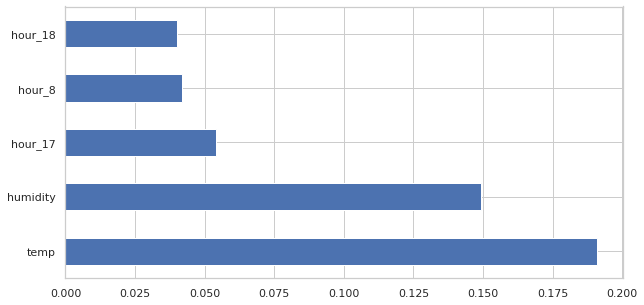

In [ ]:
feature_importances = pd.Series(best_grid.feature_importances_, index=X_train.columns)
f, ax = plt.subplots(figsize=(10,5))
feature_importances.nlargest(5).plot(kind='barh')

In [ ]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June


In [ ]:
del(test['atemp'])
del(test['date'])

In [ ]:
test.shape

(2178, 11)

In [ ]:
test = pd.get_dummies(test)
test.head()

,temp,humidity,windspeed,Total_booking,season_Fall,season_Spring,season_Summer,season_Winter,holiday_0,holiday_1,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,21.32,48,35.0008,256,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,23.78,64,7.0015,87,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,11.48,100,27.9993,11,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,25.42,83,0.0000,84,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,25.42,43,23.9994,668,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
test.shape

(2178, 58)

In [ ]:
test.columns=X_test.columns

## 12. Perform prediction on the test set and print the mean_squared_log_error

In [ ]:
# Fitting Grid Search Model to test dataset

Final_pred = best_grid.predict(test)
print('R^2 for prediction v/s test_label:',r2_score(test_label, Final_pred))
print('MSE for prediction v/s test_label :',mean_squared_log_error(test_label, Final_pred))


R^2 for prediction v/s test_label: 0.550628111182248
MSE for prediction v/s test_label : 0.7444670943228415


In [ ]:
Final_pred = pd.DataFrame(Final_pred)
Final_pred.columns = ['Predictions']
Final_pred.T

,0,1,2,3,4,5,6,7,8,9,...,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177
Predictions,268.840833,372.578333,75.604167,184.0375,280.964824,95.315,389.4225,311.84175,283.540833,10.52,...,121.835833,358.048083,461.004167,419.295,161.674167,19.440833,168.366667,138.510833,22.644167,349.59


In [ ]:
# # Join the original test data, test_label and prediction data
train = pd.read_csv('train.csv')
train_label = pd.read_csv('train_label.csv', header = None)
test = pd.read_csv('test.csv')
test_label = pd.read_csv('test_label.csv', header = None)
test['Total_booking'] = test_label[0]

In [ ]:
test.shape

(2178, 10)

In [ ]:
Final_test_data = test.join(Final_pred)
Final_test_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Predictions
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,268.840833
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,372.578333
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,75.604167
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,184.037500
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,280.964824
...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3,19.440833
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,144,168.366667
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,159,138.510833
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,29,22.644167


In [ ]:
Final_test_data['Predictions']

0       268.840833
1       372.578333
2        75.604167
3       184.037500
4       280.964824
           ...    
2173     19.440833
2174    168.366667
2175    138.510833
2176     22.644167
2177    349.590000
Name: Predictions, Length: 2178, dtype: float64

## Conclusion:
The task included importing the required libraries as well as loading the training and testing datasets. The dataset was examined by inspecting the shape of the training and testing sets, printing the data types of each column, and looking for missing values. By constructing additional columns from the datetime column, coercing the datatype of certain columns to category, and removing the datetime column, feature engineering was achieved. Outlier analysis was carried out by drawing box plots across different characteristics and eliminating any outliers found in the sample. Data visualisation was done by showing the distribution of data, total booking versus various factors, and utilising histograms to depict all of the continuous variables available in the data. Categorical variables were combined into a single hot vector, and the dataset was divided between training and testing sections. A factor plot was provided to demonstrate the `RMSE` values obtained by various modelling techniques after different machine learning models were fitted. `GridSearchCV `was used to tune the best model's hyperparameters, and the best parameters were printed. Lastly, the test set was predicted, and the mean squared log error was produced to forecast taxi booking.